In [1]:
%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import pymongo

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
sentenceDB  = client["Sentencias"]
sentenceCollection = sentenceDB["Sentencias Judiciales"]
wordCollection = sentenceDB["WordTokens"]

In [4]:
data = wordCollection.find()
df = pd.DataFrame(list(data))
df.head()

,_id,wordTokenList
0,5e9dc2a8ae8a3bcfbdb7debf,"[sala, plena, auto, supremo, 1/2012, exp, n°, ..."
1,5e9dc2a8ae8a3bcfbdb7dec0,"[sala, plena, sentencia, 15/2018, fecha, sucre..."
2,5e9dc2a8ae8a3bcfbdb7dec1,"[sala, plena, sentencia, 42/2018, fecha, sucre..."
3,5e9dc2a8ae8a3bcfbdb7dec2,"[sala, plena, sentencia, 41/2018, fecha, sucre..."
4,5e9dc2a8ae8a3bcfbdb7dec3,"[sala, plena, sentencia, 40/2018, fecha, sucre..."


In [5]:
for index, row in df.iterrows():
    df["_id"][index] = str(df["_id"][index])
df.head()

,_id,wordTokenList
0,5e9dc2a8ae8a3bcfbdb7debf,"[sala, plena, auto, supremo, 1/2012, exp, n°, ..."
1,5e9dc2a8ae8a3bcfbdb7dec0,"[sala, plena, sentencia, 15/2018, fecha, sucre..."
2,5e9dc2a8ae8a3bcfbdb7dec1,"[sala, plena, sentencia, 42/2018, fecha, sucre..."
3,5e9dc2a8ae8a3bcfbdb7dec2,"[sala, plena, sentencia, 41/2018, fecha, sucre..."
4,5e9dc2a8ae8a3bcfbdb7dec3,"[sala, plena, sentencia, 40/2018, fecha, sucre..."


In [6]:

doc=df.loc[df['_id'] == '5e9dc5baae8a3bcfbdb857bb']
doc

,_id,wordTokenList
30962,5e9dc5baae8a3bcfbdb857bb,"[sala, penal, liquidadora, auto, supremo, nº, ..."


In [7]:
comment_words= " ".join(doc['wordTokenList'][30962])

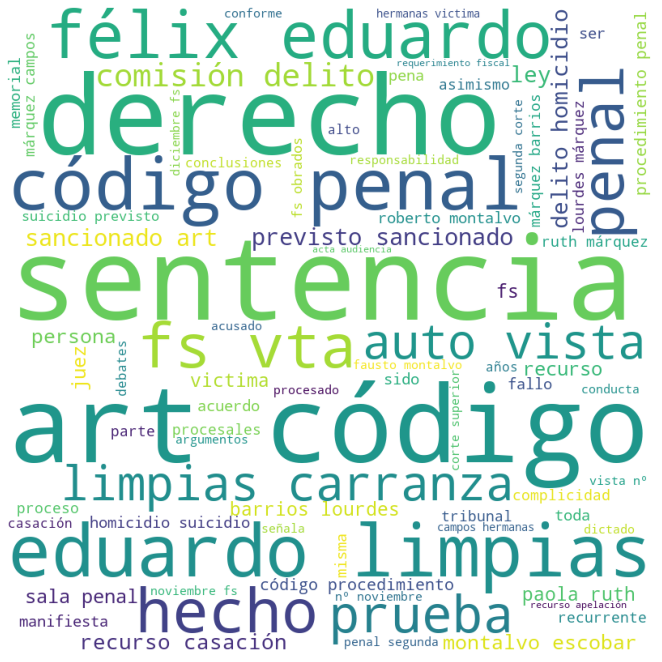

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 12).generate(comment_words) 
#plot the WordCloud image                        
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [9]:
image_name = "imagenCaso"+".png"
wordcloud.to_file(image_name)